In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:

d = pd.read_csv("combined_data.csv")

In [16]:
d["phraseid"].nunique()

44

In [17]:
averages = d.groupby("phraseid", as_index=False)[["q1", "q2"]].mean()

In [18]:
averages.head()

,phraseid,q1,q2
0,1,5.000000,5.000000
1,2,5.000000,5.000000
2,3,5.000000,5.000000
3,4,5.000000,5.000000
4,5,1.666667,1.666667


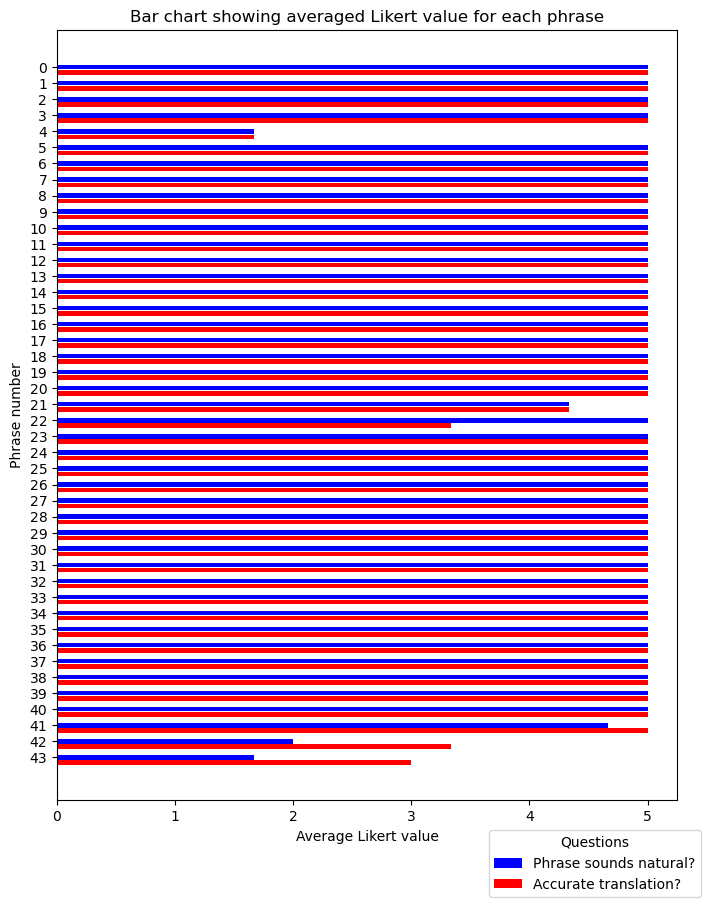

In [36]:

fig, ax = plt.subplots( figsize=(8, 10))

people = [str(c) for c in range(d["phraseid"].nunique())]
y_tick_modifer=1.8
y_ticks = [y_tick_modifer*c for c in np.arange(len(people))]
bar_offset=0.3
y_pos_1 = [c-bar_offset for c in y_ticks]
y_pos_2 = [c+bar_offset for c in y_ticks]

custom_labels = ["Phrase sounds natural?", "Accurate translation?"]

ax.barh(y_pos_1, averages["q1"], height=0.5, align="center", color="blue", label=custom_labels[0])
ax.barh(y_pos_2, averages["q2"], height=0.5, align="center", color="red", label=custom_labels[1])
plt.yticks(y_ticks)  # ticks at -1, -0.5, 0, 0.5, 1

ax.set_yticks(y_pos_1, labels=people)

ax.invert_yaxis() 
ax.set_xlabel('Average Likert value')
ax.set_ylabel("Phrase number")
ax.set_title('Bar chart showing averaged Likert value for each phrase')
# Add legend
ax.legend(title="Questions", loc='upper right', bbox_to_anchor=(1.05, -0.03))
plt.show()
fig.savefig("phrasereviewplot.png")